Nama : Rika Ajeng Finatih

NIM : 121450036

Kelas : Pengenalan Pola RA

# Template Matching

Template Matching adalah teknik dalam pengolahan citra (image processing) dan visi komputer (computer vision) yang digunakan untuk menemukan lokasi sebuah template (sub-citra atau pola tertentu) dalam citra yang lebih besar. Proses ini melibatkan pencarian bagian citra yang paling sesuai dengan template yang diberikan.

Implementasi template maching dengan menggunakan python sebegai berikut.

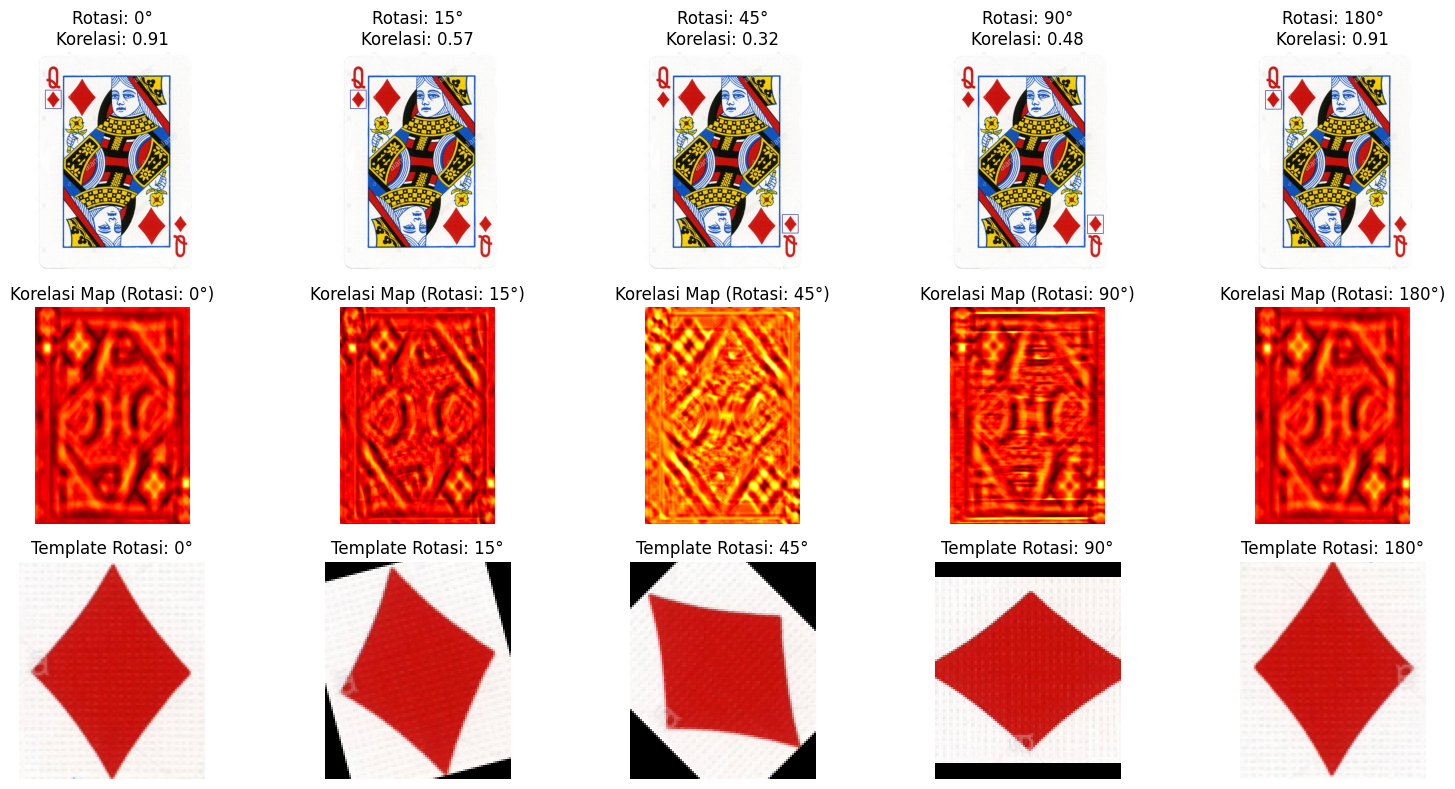

Korelasi terbaik ditemukan pada rotasi 0° dengan nilai korelasi 0.91.


In [35]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Membaca gambar input dan template
input_image = cv2.imread('/content/image.jpg')  # Membaca dalam warna
template = cv2.imread('/content/template.png')  # Membaca dalam warna

# Fungsi untuk melakukan template matching dan menandai hasilnya
def match_template(input_image, template, angle):
    # Rotasi template
    (h, w) = template.shape[:2]
    center = (w // 2, h // 2)
    M = cv2.getRotationMatrix2D(center, angle, 1.0)
    rotated_template = cv2.warpAffine(template, M, (w, h))

    # Melakukan template matching
    result = cv2.matchTemplate(input_image, rotated_template, cv2.TM_CCOEFF_NORMED)
    min_val, max_val, min_loc, max_loc = cv2.minMaxLoc(result)

    # Tandai hasil matching pada gambar input
    top_left = max_loc
    bottom_right = (top_left[0] + w, top_left[1] + h)
    marked_image = input_image.copy()
    cv2.rectangle(marked_image, top_left, bottom_right, (139, 0, 0), 2)  # Warna biru tua pekat

    return max_val, marked_image, result, rotated_template

# Daftar sudut rotasi
angles = [0, 15, 45, 90, 180]
results = []

# Melakukan template matching untuk setiap rotasi
for angle in angles:
    max_val, marked_image, result, rotated_template = match_template(input_image, template, angle)
    results.append((angle, max_val, marked_image, result, rotated_template))

# Tampilkan hasil
plt.figure(figsize=(16, 8))
for i, (angle, max_val, marked_image, result, rotated_template) in enumerate(results):
    plt.subplot(3, len(angles), i+1)
    plt.imshow(cv2.cvtColor(marked_image, cv2.COLOR_BGR2RGB))  # Konversi BGR ke RGB untuk matplotlib
    plt.title(f"Rotasi: {angle}°\nKorelasi: {max_val:.2f}")
    plt.axis('off')

    plt.subplot(3, len(angles), len(angles) + i+1)
    plt.imshow(result, cmap='hot')
    plt.title(f"Korelasi Map (Rotasi: {angle}°)")
    plt.axis('off')

    plt.subplot(3, len(angles), 2 * len(angles) + i+1)
    plt.imshow(cv2.cvtColor(rotated_template, cv2.COLOR_BGR2RGB))
    plt.title(f"Template Rotasi: {angle}°")
    plt.axis('off')

plt.tight_layout()
plt.show()

# Bandingkan korelasi terbaik
best_match = max(results, key=lambda x: x[1])
print(f"Korelasi terbaik ditemukan pada rotasi {best_match[0]}° dengan nilai korelasi {best_match[1]:.2f}.")


**Hasil Analisis:**


Template matching adalah teknik dalam pengolahan citra yang digunakan untuk menemukan kemiripan antara sebuah template (pola yang ingin dicari) dengan bagian dari citra yang lebih besar. Dalam kasus ini, template yang digunakan adalah kartu remi dengan rotasi yang berbeda-beda, yaitu 0°, 15°, 45°, 90°, dan 180°. Berdasarkan hasil percobaan, diketahui bahwa template kartu remi dengan rotasi 0° dan 180° memiliki nilai korelasi yang tinggi, yaitu 0,91 atau 91%. Ini menunjukkan bahwa template remi berhasil menemukan kemiripan antara template dengan bagian citra kartu remi yang lebih besar. Hal ini ditandai dengan area kotak berwarna biru yang menunjukkan tingkat kemiripan tertinggi dengan template yang digunakan. Sebaliknya, rotasi template dengan 15°, 45°, dan 90° menunjukkan nilai korelasi yang lebih rendah, yang menandakan penurunan kemiripan akibat perubahan orientasi.

Perubahan hasil template matching saat menggunakan rotasi template dapat terjadi karena beberapa alasan terkait dengan bagaimana metode ini menangani perbedaan orientasi. Ketika template diputar, pola dalam template berubah orientasinya. Jika template diputar pada sudut yang berbeda dari citra yang lebih besar, pola tersebut mungkin tidak sejajar dengan objek yang ada di citra. Korelasi silang (cross-correlation) mengukur seberapa baik template cocok dengan bagian citra pada setiap posisi. Ketika template diputar, hubungan antara pola dalam template dan bagian citra yang dicocokkan berubah. Rotasi template menyebabkan perubahan dalam geometri pola yang dicocokkan, sehingga bagian-bagian template yang seharusnya berada pada posisi tertentu mungkin tidak lagi berada pada posisi yang sesuai setelah rotasi.

